In [31]:
noise_trials.delete_all()

In [32]:
%reload_ext autoreload
%autoreload 2

import json
import numpy as np
from collections import namedtuple
from hyperopt import fmin, tpe, hp
from hyperopt.mongoexp import MongoTrials

from ddpg_agent.QuadcopterEvaluator import noise_evaluator, evaluator

EXP_NUM=6

noise_trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key='quadcopter_noise_exp%03i'%EXP_NUM)

noise_space = namedtuple('NoiseParams',['ou_mu','ou_theta','ou_sigma','n_episodes','eps'])(
        0,
        hp.uniform('ou_theta',0,.5),
        1,
        100,
        hp.uniform('eps',1,100),
    )

best_noise = fmin(noise_evaluator, noise_space, trials=noise_trials, algo=tpe.suggest, max_evals=100 )

print(best_noise)

1089it [18:22,  1.04s/it, best loss: -801.9542254917948]       
{'eps': 1.0214458530537844, 'ou_theta': 0.22268966337029378}


In [98]:
from ddpg_agent.QuadcopterEvaluator import LearningParams
from ddpg_agent.QuadcopterEvaluator import evaluator

learning_params = LearningParams(
    ou_mu=0, ou_theta=0.2, ou_sigma=1, n_episodes=400, eps=hp.uniform('eps',1,20),
    eps_decay=0, primary_exploration_eps=0, act_random_first_n_episodes=0,
    discount_factor=.9, 
    replay_buffer_size=100000, 
    replay_batch_size=1028,
    tau_actor=.8,
    tau_critic=.8,
    lr_actor=.0001,
    lr_critic=.001,
    output_action_regularizer=hp.uniform('output_action_regularizer',0,2),
)
EXP_NUM=7
learning_trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key='quadcopter_learning_exp%03i'%EXP_NUM)
best_learning_params = fmin(evaluator, learning_params, trials=learning_trials, algo=tpe.suggest, max_evals=232 )
print(best_learning_params)

over-writing old domain trials attachment


0it [00:00, ?it/s, best loss: ?]
{'eps': 14.958592409940854, 'output_action_regularizer': 0.6294379917819996}


In [99]:
from ddpg_agent.QuadcopterEvaluator import LearningParams
from ddpg_agent.QuadcopterEvaluator import evaluator

learning_params = LearningParams(
    ou_mu=0, ou_theta=0.2, ou_sigma=1, n_episodes=400, eps=hp.uniform('eps',1,100),
    eps_decay=0, primary_exploration_eps=None, act_random_first_n_episodes=50,
    discount_factor=.9, 
    replay_buffer_size=100000, 
    replay_batch_size=1028,
    tau_actor=hp.uniform('tau_actor',.2,.9),
    tau_critic=hp.uniform('tau_critic',.2,.9),
    lr_actor=.001,
    lr_critic=.001,
    output_action_regularizer=hp.choice('output_action_regularizer',[0,.5]),
)
EXP_NUM=8
learning_trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key='quadcopter_learning_exp%03i'%EXP_NUM)
best_learning_params = fmin(evaluator, learning_params, trials=learning_trials, algo=tpe.suggest, max_evals=99 )
print(best_learning_params)

over-writing old domain trials attachment


0it [00:00, ?it/s, best loss: ?]
{'eps': 51.58646967163389, 'output_action_regularizer': 1, 'tau_actor': 0.6338302098712414, 'tau_critic': 0.24154515222737621}


Trial 1/3


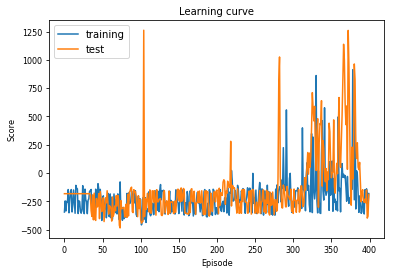

Trial 2/3


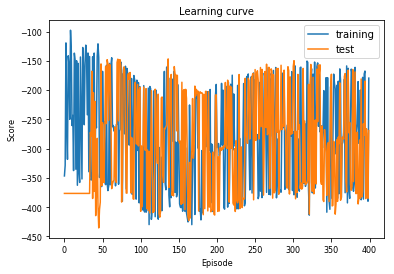

Trial 3/3


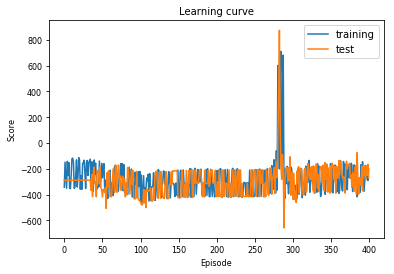

In [106]:
from ddpg_agent.agent import EpisodeHistory
from ddpg_agent.visualizations import plot_quadcopter_episode, plot_scores

ep_history = json.loads(dict(learning_trials.trial_attachments(learning_trials.best_trial))['history'])
for i in range(3):
    training_scores = [np.sum(ep['rewards']) for ep in ep_history[i]['training_episodes']]
    test_scores = [np.sum(ep['rewards']) for ep in ep_history[i]['test_episodes']]
    print("Trial %i/3"%(i+1))
    plot_scores(training_scores, test_scores)
    plt.show()

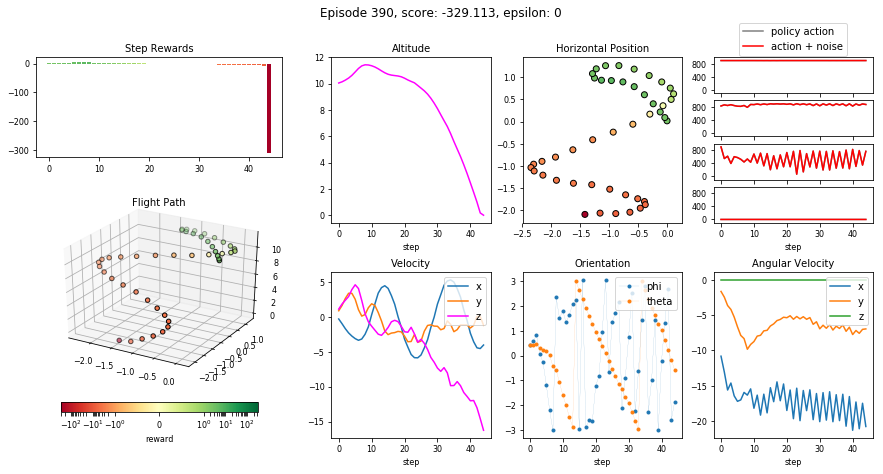

In [108]:
ep = EpisodeHistory._fromDict(ep_history[i]['test_episodes'][389])
plot_quadcopter_episode(ep)